In [1]:
#```{r results='hide', message=FALSE, warning=FALSE}
# install all Packages required
# install.packages('ggplot2')
# Load Libraries to be used
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyverse)
library(summarytools)
library(visdat)
library(igraph)
#library(treemap)
#library(dplyr)
library(devtools)
#```# Do not show warnings

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'knitr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.3     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning me

In [2]:
#install.packages("readxl")
library("readxl")
# my_data <- read_excel(file.choose())

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [3]:
kapoor_df <- read_excel("Data/kapoor.xlsx")
head(kapoor_df)

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008-01-01,5384.55,95.8682,295.96,1244.579,182.45,51.85673,87.251,265.176,756.5146,315.9688,211.65,468.007
2008-01-02,5437.80,99.7002,291.19,1242.210,179.69,51.56961,86.596,262.504,757.5695,312.7114,211.36,467.233
2008-01-03,5442.20,99.6373,288.63,1217.149,185.25,52.56346,82.962,254.799,751.5648,317.6993,226.98,459.924
2008-01-04,5502.60,98.5376,288.63,1275.376,200.73,53.64565,81.049,253.258,755.7032,318.0047,223.16,459.343
2008-01-07,5500.15,98.7452,282.33,1285.615,189.72,54.90452,81.572,247.093,751.2402,306.1965,220.98,452.615
2008-01-08,5460.30,96.7476,292.21,1301.986,181.50,52.85057,81.378,252.693,723.2452,293.6555,217.77,470.573


In [4]:
#kapoor_diff <- diff(select(kapoor_df,CNX:BHARTI))
#head(kapoor_df)
names(kapoor_df)

[1] "DATE"       "CNX"        "TATA AUTO"  "HDFC"       "LARSEN"    
 [6] "TKK"        "DABUR"      "SUN"        "WIPRO"      "TATA STEEL"
[11] "INDIAN"     "NTPC"       "BHARTI"

In [8]:
#sapply(kapoor_df, class)

In [9]:
#head(kapoor_df[-1,2]) # P(t)

In [10]:
#tail(kapoor_df[,2]) #P(t-1)

In [15]:
head(kapoor_df[order(kapoor_df$DATE, decreasing=TRUE),])

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2014-12-31,6773.65,490.291,944.50,1479.624,3574.58,233.1141,826.15,543.705,388.0048,326.7645,141.10,350.736
2014-12-30,6733.75,488.510,949.31,1483.188,3532.07,231.6681,820.55,541.109,384.9933,327.0103,139.09,347.803
2014-12-29,6718.60,489.796,944.60,1475.318,3488.51,227.8285,820.25,538.759,392.5708,326.4694,137.28,349.244
2014-12-26,6674.80,480.001,941.57,1475.219,3482.94,229.3245,811.20,536.066,386.8877,322.3387,136.49,352.327
2014-12-24,6650.60,478.814,938.20,1462.993,3494.03,227.7787,804.70,534.205,383.9733,321.4536,136.54,351.134
2014-12-23,6703.00,482.970,952.59,1482.743,3492.59,232.1667,813.05,540.963,383.5361,329.5182,140.07,353.222


In [16]:
tail(kapoor_df[-nrow(kapoor_df[,2]),2])

CNX
6744.15
6703.00
6650.60
6674.80
6718.60
6733.75


In [17]:
head((kapoor_df[-1,2]/kapoor_df[-nrow(kapoor_df[,2]),2]))

CNX
1.0098894
1.0008092
1.0110984
0.9995547
0.9927547
0.9984616


In [18]:
seq(2,ncol(kapoor_df))

[1]  2  3  4  5  6  7  8  9 10 11 12 13

In [19]:
ncol(kapoor_df)

[1] 13

### Simple Gross Returns

$$ \frac{P_{t}}{P_{t-1}}=1+R_{t} $$

Over the last k periods

$$ 1+R_{t}(k) = \frac{P_{t}}{P_{t-k}} = \left(\frac{P_{t}}{P_{t-1}}\right)\left(\frac{P_{t-1}}{P_{t-2}}\right)...\left(\frac{P_{t-k+1}}{P_{t-k}}\right) $$

$$ = (1+R_{t})...(1+R_{t-k+1}) $$

In [20]:
GrossRet_df <- (kapoor_df[-1,-1]/kapoor_df[-nrow(kapoor_df[,]),-1])

In [21]:
head(GrossRet_df)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
1.0098894,1.0399715,0.9838830,0.9980970,0.9848726,0.9944632,0.9924929,0.9899237,1.0013944,0.9896908,0.9986298,0.9983462
1.0008092,0.9993691,0.9912085,0.9798254,1.0309422,1.0192720,0.9580350,0.9706481,0.9920737,1.0159505,1.0739023,0.9843568
1.0110984,0.9889630,1.0000000,1.0478388,1.0835628,1.0205883,0.9769413,0.9939521,1.0055064,1.0009613,0.9831703,0.9987367
0.9995547,1.0021068,0.9781727,1.0080281,0.9451502,1.0234664,1.0064529,0.9756572,0.9940942,0.9628678,0.9902312,0.9853530
0.9927547,0.9797702,1.0349945,1.0127342,0.9566730,0.9625905,0.9976217,1.0226635,0.9627350,0.9590426,0.9854738,1.0396761
0.9984616,1.0019494,1.0177612,1.0012104,0.9701377,0.9908065,0.9874659,1.0004037,1.0028049,0.9957018,1.0462414,0.9989205


In [22]:
summary(GrossRet_df)

      CNX           TATA AUTO           HDFC            LARSEN      
 Min.   :0.8905   Min.   :0.8235   Min.   :0.8854   Min.   :0.8911  
 1st Qu.:0.9932   1st Qu.:0.9846   1st Qu.:0.9905   1st Qu.:0.9874  
 Median :1.0006   Median :1.0000   Median :1.0001   Median :0.9998  
 Mean   :1.0003   Mean   :1.0014   Mean   :1.0009   Mean   :1.0004  
 3rd Qu.:1.0074   3rd Qu.:1.0171   3rd Qu.:1.0110   3rd Qu.:1.0133  
 Max.   :1.1622   Max.   :1.1908   Max.   :1.1581   Max.   :1.2453  
      TKK             DABUR             SUN             WIPRO       
 Min.   :0.8236   Min.   :0.8366   Min.   :0.8783   Min.   :0.8219  
 1st Qu.:0.9876   1st Qu.:0.9912   1st Qu.:0.9916   1st Qu.:0.9895  
 Median :1.0000   Median :1.0005   Median :1.0003   Median :1.0007  
 Mean   :1.0022   Mean   :1.0011   Mean   :1.0015   Mean   :1.0007  
 3rd Qu.:1.0134   3rd Qu.:1.0106   3rd Qu.:1.0111   3rd Qu.:1.0120  
 Max.   :1.2031   Max.   :1.1774   Max.   :1.1383   Max.   :1.1254  
   TATA STEEL         INDIAN      

In [23]:
view(dfSummary(GrossRet_df), method = "viewer", file = "Data/dfSummary_GRkapoor.html")

Output file written: C:\Users\woosh\Documents\R Scripts\Data\dfSummary_GRkapoor.html


In [24]:
#install.packages('IRdisplay')
IRdisplay::display_html('<iframe src="./Data/dfSummary_GRkapoor.html" width=1000, height=1000></iframe>')

In [25]:
dplyr::summarise_all(GrossRet_df, mean)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
1.000253,1.001412,1.000897,1.00041,1.002181,1.001058,1.00149,1.000689,1.000073,1.00029,0.9999701,1.000133


In [26]:
dplyr::summarise_all(GrossRet_df, sd)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0155368,0.0307536,0.02129764,0.02503423,0.03065582,0.01948208,0.01958096,0.02337076,0.03027715,0.02329676,0.0202055,0.02454893


In [27]:
GrossRet_df<- add_column(GrossRet_df,kapoor_df[-1,1],.before = TRUE)
head(GrossRet_df)

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008-01-02,1.0098894,1.0399715,0.9838830,0.9980970,0.9848726,0.9944632,0.9924929,0.9899237,1.0013944,0.9896908,0.9986298,0.9983462
2008-01-03,1.0008092,0.9993691,0.9912085,0.9798254,1.0309422,1.0192720,0.9580350,0.9706481,0.9920737,1.0159505,1.0739023,0.9843568
2008-01-04,1.0110984,0.9889630,1.0000000,1.0478388,1.0835628,1.0205883,0.9769413,0.9939521,1.0055064,1.0009613,0.9831703,0.9987367
2008-01-07,0.9995547,1.0021068,0.9781727,1.0080281,0.9451502,1.0234664,1.0064529,0.9756572,0.9940942,0.9628678,0.9902312,0.9853530
2008-01-08,0.9927547,0.9797702,1.0349945,1.0127342,0.9566730,0.9625905,0.9976217,1.0226635,0.9627350,0.9590426,0.9854738,1.0396761
2008-01-09,0.9984616,1.0019494,1.0177612,1.0012104,0.9701377,0.9908065,0.9874659,1.0004037,1.0028049,0.9957018,1.0462414,0.9989205


In [28]:
names(GrossRet_df)

[1] "DATE"       "CNX"        "TATA AUTO"  "HDFC"       "LARSEN"    
 [6] "TKK"        "DABUR"      "SUN"        "WIPRO"      "TATA STEEL"
[11] "INDIAN"     "NTPC"       "BHARTI"

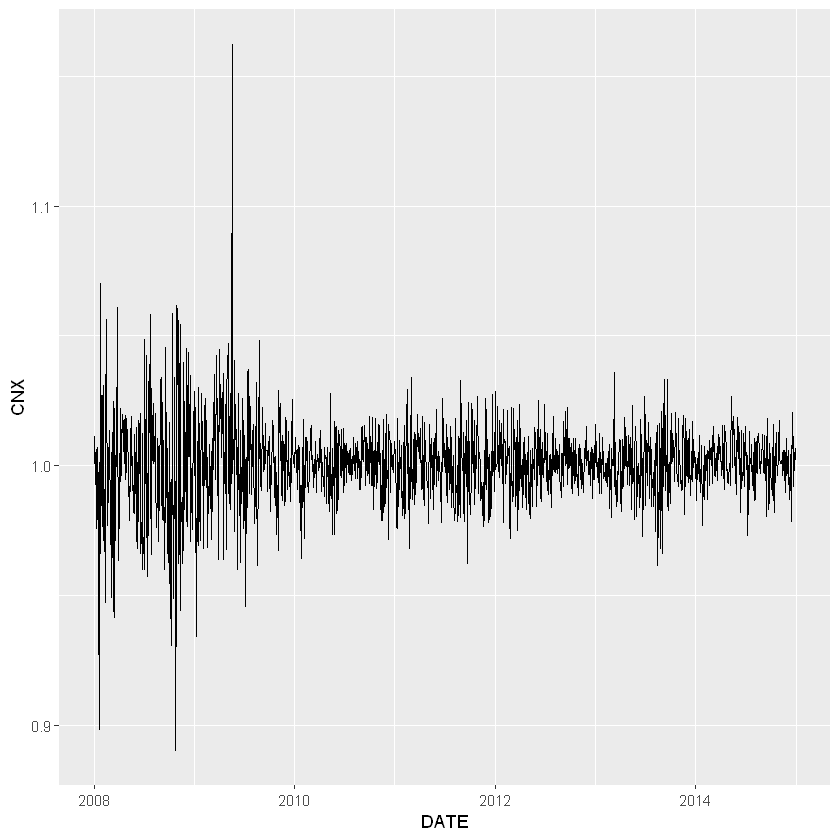

In [29]:
ggplot(GrossRet_df) + geom_line(aes(DATE, CNX ))

In [30]:
SimpleRet_df <- (kapoor_df[-1,-1]/kapoor_df[-nrow(kapoor_df[,]),-1]-1)

In [31]:
head(SimpleRet_df)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0098894062,0.0399715443,-0.016117043,-0.001902974,-0.01512743,-0.005536793,-0.007507077,-0.0100763267,0.001394421,-0.0103092457,-0.001370187,-0.001653821
0.0008092225,-0.0006308914,-0.008791511,-0.020174607,0.03094218,0.019272009,-0.041964987,-0.0293519337,-0.007926269,0.0159504898,0.073902347,-0.015643159
0.0110984346,-0.0110370313,0.000000000,0.047838843,0.08356275,0.020588257,-0.023058750,-0.0060479044,0.005506378,0.0009612863,-0.016829677,-0.001263252
-0.0004452797,0.0021068100,-0.021827253,0.008028064,-0.05484980,0.023466395,0.006452887,-0.0243427651,-0.005905758,-0.0371321556,-0.009768776,-0.014647007
-0.0072452747,-0.0202298441,0.034994510,0.012734219,-0.04332701,-0.037409488,-0.002378267,0.0226635315,-0.037265045,-0.0409573591,-0.014526201,0.039676104
-0.0015383593,0.0019494024,0.017761199,0.001210382,-0.02986226,-0.009193468,-0.012534100,0.0004036519,0.002804858,-0.0042982338,0.046241447,-0.001079535


In [32]:
SimpleRet_df<- add_column(SimpleRet_df,kapoor_df[-1,1],.before = TRUE)
head(SimpleRet_df)

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008-01-02,0.0098894062,0.0399715443,-0.016117043,-0.001902974,-0.01512743,-0.005536793,-0.007507077,-0.0100763267,0.001394421,-0.0103092457,-0.001370187,-0.001653821
2008-01-03,0.0008092225,-0.0006308914,-0.008791511,-0.020174607,0.03094218,0.019272009,-0.041964987,-0.0293519337,-0.007926269,0.0159504898,0.073902347,-0.015643159
2008-01-04,0.0110984346,-0.0110370313,0.000000000,0.047838843,0.08356275,0.020588257,-0.023058750,-0.0060479044,0.005506378,0.0009612863,-0.016829677,-0.001263252
2008-01-07,-0.0004452797,0.0021068100,-0.021827253,0.008028064,-0.05484980,0.023466395,0.006452887,-0.0243427651,-0.005905758,-0.0371321556,-0.009768776,-0.014647007
2008-01-08,-0.0072452747,-0.0202298441,0.034994510,0.012734219,-0.04332701,-0.037409488,-0.002378267,0.0226635315,-0.037265045,-0.0409573591,-0.014526201,0.039676104
2008-01-09,-0.0015383593,0.0019494024,0.017761199,0.001210382,-0.02986226,-0.009193468,-0.012534100,0.0004036519,0.002804858,-0.0042982338,0.046241447,-0.001079535


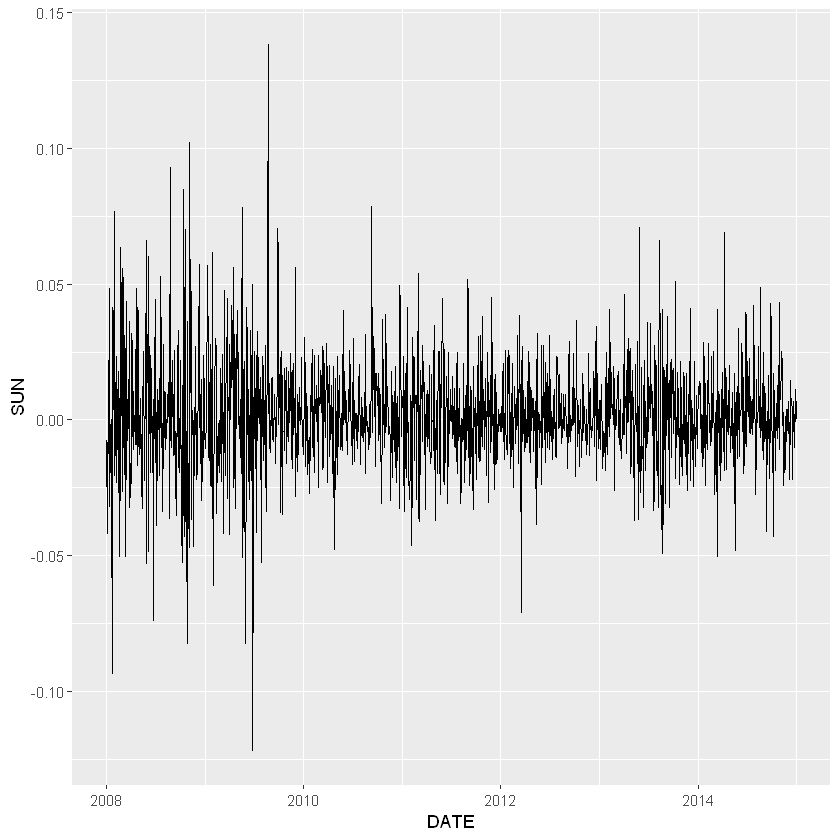

In [33]:
ggplot(SimpleRet_df) + geom_line(aes(DATE, SUN ))

In [34]:
dplyr::summarise_all(select(SimpleRet_df,CNX:BHARTI), mean)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0002530938,0.001412376,0.0008967399,0.0004102782,0.002180832,0.001057902,0.001490284,0.0006893665,7.333185e-05,0.0002904934,-2.990877e-05,0.0001326445


In [35]:
dplyr::summarise_all(select(SimpleRet_df,CNX:BHARTI), sd)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0155368,0.0307536,0.02129764,0.02503423,0.03065582,0.01948208,0.01958096,0.02337076,0.03027715,0.02329676,0.0202055,0.02454893


### Log Return

Continously compounded returns 

$$ r_{t} = log(1+R_{t}) = log\left(\frac{P_{t}}{P_{t-1}}\right) =p_{t}-p_{t-1} $$

If $$R_{t}$$ is small then $$ log(1+R_{t}) \approx R_{t} $$

which makes it easy to calculate the return in a multiperiod return (k periods)

$$ r_{t}(k) =  \textrm{log}\{1+R_{t}(k)\} \\
 = \textrm{log}\{(1+R_{t})...(1+R_{t-k+1})\} \\
 =  \textrm{log}(1+R_{t})+...+ \textrm{log}(1+R_{t-k+1})$$
$$ = r_{t} + r_{t-1}+...+r_{t-k+1}$$

then

$$ r_{t}(k) =  \textrm{log}\{1+R_{t}(k)\} = r_{t} + r_{t-1}+...+r_{t-k+1}$$

In [37]:
head(GrossRet_df)

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008-01-02,1.0098894,1.0399715,0.9838830,0.9980970,0.9848726,0.9944632,0.9924929,0.9899237,1.0013944,0.9896908,0.9986298,0.9983462
2008-01-03,1.0008092,0.9993691,0.9912085,0.9798254,1.0309422,1.0192720,0.9580350,0.9706481,0.9920737,1.0159505,1.0739023,0.9843568
2008-01-04,1.0110984,0.9889630,1.0000000,1.0478388,1.0835628,1.0205883,0.9769413,0.9939521,1.0055064,1.0009613,0.9831703,0.9987367
2008-01-07,0.9995547,1.0021068,0.9781727,1.0080281,0.9451502,1.0234664,1.0064529,0.9756572,0.9940942,0.9628678,0.9902312,0.9853530
2008-01-08,0.9927547,0.9797702,1.0349945,1.0127342,0.9566730,0.9625905,0.9976217,1.0226635,0.9627350,0.9590426,0.9854738,1.0396761
2008-01-09,0.9984616,1.0019494,1.0177612,1.0012104,0.9701377,0.9908065,0.9874659,1.0004037,1.0028049,0.9957018,1.0462414,0.9989205


In [39]:
LogRet_df <- log(GrossRet_df[,-1])

In [40]:
head(LogRet_df)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0098408260,0.0391933515,-0.016248335,-0.001904787,-0.01524302,-0.005552178,-0.007535397,-0.0101274365,0.001393450,-0.0103627541,-0.001371126,-0.001655190
0.0008088953,-0.0006310905,-0.008830384,-0.020380893,0.03047312,0.019088656,-0.042870953,-0.0297913210,-0.007957849,0.0158246175,0.071299067,-0.015766804
0.0110372989,-0.0110983912,0.000000000,0.046729798,0.08025446,0.020379183,-0.023328762,-0.0060662671,0.005491273,0.0009608246,-0.016972905,-0.001264051
-0.0004453788,0.0021045938,-0.022068992,0.007996010,-0.05641142,0.023195292,0.006432156,-0.0246439480,-0.005923266,-0.0378391098,-0.009816803,-0.014755333
-0.0072716492,-0.0204372696,0.034396122,0.012653820,-0.04429365,-0.038127179,-0.002381100,0.0224105292,-0.037977134,-0.0418197411,-0.014632740,0.038909227
-0.0015395438,0.0019475047,0.017605312,0.001209650,-0.03031722,-0.009235988,-0.012613315,0.0004035704,0.002800932,-0.0043074978,0.045204168,-0.001080118


In [41]:
dplyr::summarise_all(LogRet_df, sum)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.2295064,1.632025,1.160431,0.1729914,2.975127,1.503043,2.247987,0.7180131,-0.6677041,0.03359625,-0.4054651,-0.2884494


In [42]:
LogRet_df<- add_column(LogRet_df,kapoor_df[-1,1],.before = TRUE)
head(LogRet_df)

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008-01-02,0.0098408260,0.0391933515,-0.016248335,-0.001904787,-0.01524302,-0.005552178,-0.007535397,-0.0101274365,0.001393450,-0.0103627541,-0.001371126,-0.001655190
2008-01-03,0.0008088953,-0.0006310905,-0.008830384,-0.020380893,0.03047312,0.019088656,-0.042870953,-0.0297913210,-0.007957849,0.0158246175,0.071299067,-0.015766804
2008-01-04,0.0110372989,-0.0110983912,0.000000000,0.046729798,0.08025446,0.020379183,-0.023328762,-0.0060662671,0.005491273,0.0009608246,-0.016972905,-0.001264051
2008-01-07,-0.0004453788,0.0021045938,-0.022068992,0.007996010,-0.05641142,0.023195292,0.006432156,-0.0246439480,-0.005923266,-0.0378391098,-0.009816803,-0.014755333
2008-01-08,-0.0072716492,-0.0204372696,0.034396122,0.012653820,-0.04429365,-0.038127179,-0.002381100,0.0224105292,-0.037977134,-0.0418197411,-0.014632740,0.038909227
2008-01-09,-0.0015395438,0.0019475047,0.017605312,0.001209650,-0.03031722,-0.009235988,-0.012613315,0.0004035704,0.002800932,-0.0043074978,0.045204168,-0.001080118


### Visualization (Single Line)

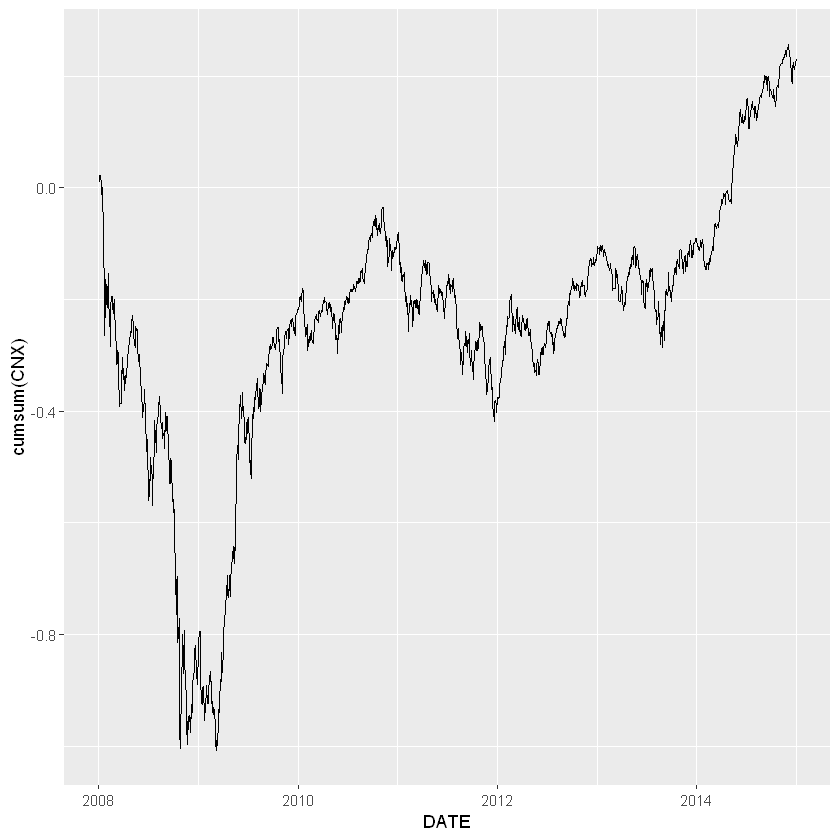

In [43]:
ggplot(LogRet_df) + geom_line(aes(DATE, cumsum(CNX)))

In [44]:
names(LogRet_df)

[1] "DATE"       "CNX"        "TATA AUTO"  "HDFC"       "LARSEN"    
 [6] "TKK"        "DABUR"      "SUN"        "WIPRO"      "TATA STEEL"
[11] "INDIAN"     "NTPC"       "BHARTI"

### Visualization Option 1 (Multiple lines)

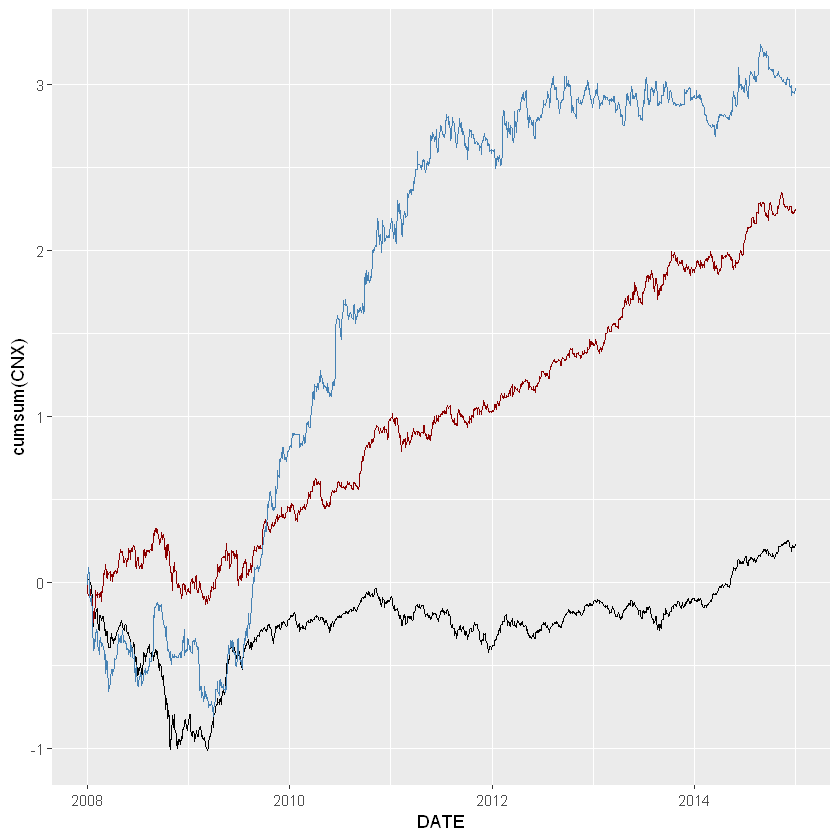

In [45]:

p <- ggplot(LogRet_df, aes(x=DATE)) + geom_line(aes(y=cumsum(CNX)))
p <- p + geom_line(aes(y=cumsum(SUN)), color="darkred")
p <- p + geom_line(aes(y=cumsum(TKK)), color="steelblue")
p

In [46]:
CumLogRet_df <- cumsum(log(GrossRet_df[,-1]))
head(CumLogRet_df)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.009840826,0.039193351,-0.016248335,-0.001904787,-0.015243019,-0.005552178,-0.007535397,-0.01012744,0.001393450,-0.010362754,-0.001371126,-0.001655190
0.010649721,0.038562261,-0.025078719,-0.022285680,0.015230101,0.013536478,-0.050406351,-0.03991876,-0.006564399,0.005461863,0.069927941,-0.017421995
0.021687020,0.027463870,-0.025078719,0.024444119,0.095484559,0.033915661,-0.073735112,-0.04598502,-0.001073126,0.006422688,0.052955036,-0.018686045
0.021241641,0.029568464,-0.047147711,0.032440129,0.039073138,0.057110953,-0.067302957,-0.07062897,-0.006996392,-0.031416422,0.043138233,-0.033441379
0.013969992,0.009131194,-0.012751588,0.045093949,-0.005220509,0.018983774,-0.069684056,-0.04821844,-0.044973525,-0.073236163,0.028505493,0.005467848
0.012430448,0.011078699,0.004853724,0.046303599,-0.035537726,0.009747785,-0.082297371,-0.04781487,-0.042172594,-0.077543661,0.073709661,0.004387730


In [47]:
CumLogRet_df<- add_column(CumLogRet_df,kapoor_df[-1,1],.before = TRUE)
head(CumLogRet_df)

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008-01-02,0.009840826,0.039193351,-0.016248335,-0.001904787,-0.015243019,-0.005552178,-0.007535397,-0.01012744,0.001393450,-0.010362754,-0.001371126,-0.001655190
2008-01-03,0.010649721,0.038562261,-0.025078719,-0.022285680,0.015230101,0.013536478,-0.050406351,-0.03991876,-0.006564399,0.005461863,0.069927941,-0.017421995
2008-01-04,0.021687020,0.027463870,-0.025078719,0.024444119,0.095484559,0.033915661,-0.073735112,-0.04598502,-0.001073126,0.006422688,0.052955036,-0.018686045
2008-01-07,0.021241641,0.029568464,-0.047147711,0.032440129,0.039073138,0.057110953,-0.067302957,-0.07062897,-0.006996392,-0.031416422,0.043138233,-0.033441379
2008-01-08,0.013969992,0.009131194,-0.012751588,0.045093949,-0.005220509,0.018983774,-0.069684056,-0.04821844,-0.044973525,-0.073236163,0.028505493,0.005467848
2008-01-09,0.012430448,0.011078699,0.004853724,0.046303599,-0.035537726,0.009747785,-0.082297371,-0.04781487,-0.042172594,-0.077543661,0.073709661,0.004387730


### Visualization Option 2 (Multiple Lines)

In [48]:
# Data preparation
df <- CumLogRet_df %>%
  gather(key = "stock", value = "CumReturn", -DATE)
head(df)

DATE,stock,CumReturn
2008-01-02,CNX,0.009840826
2008-01-03,CNX,0.010649721
2008-01-04,CNX,0.021687020
2008-01-07,CNX,0.021241641
2008-01-08,CNX,0.013969992
2008-01-09,CNX,0.012430448


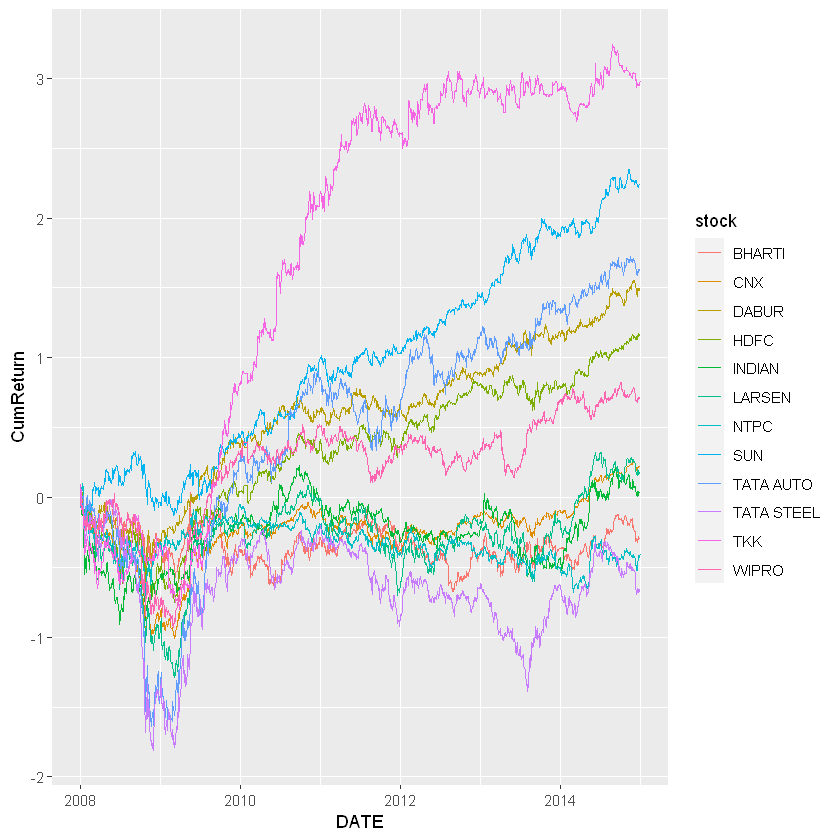

In [49]:
# Visualization
p <- ggplot(df, aes(x = DATE, y = CumReturn))  
p <- p + geom_line(aes(color = stock))
#p <- p +  scale_color_manual(values = c("darkred", "steelblue"))
p

## CAPM

### Obtain betas for each Sector

In [50]:
simple_df <- select(SimpleRet_df, CNX:BHARTI)
head(simple_df)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0098894062,0.0399715443,-0.016117043,-0.001902974,-0.01512743,-0.005536793,-0.007507077,-0.0100763267,0.001394421,-0.0103092457,-0.001370187,-0.001653821
0.0008092225,-0.0006308914,-0.008791511,-0.020174607,0.03094218,0.019272009,-0.041964987,-0.0293519337,-0.007926269,0.0159504898,0.073902347,-0.015643159
0.0110984346,-0.0110370313,0.000000000,0.047838843,0.08356275,0.020588257,-0.023058750,-0.0060479044,0.005506378,0.0009612863,-0.016829677,-0.001263252
-0.0004452797,0.0021068100,-0.021827253,0.008028064,-0.05484980,0.023466395,0.006452887,-0.0243427651,-0.005905758,-0.0371321556,-0.009768776,-0.014647007
-0.0072452747,-0.0202298441,0.034994510,0.012734219,-0.04332701,-0.037409488,-0.002378267,0.0226635315,-0.037265045,-0.0409573591,-0.014526201,0.039676104
-0.0015383593,0.0019494024,0.017761199,0.001210382,-0.02986226,-0.009193468,-0.012534100,0.0004036519,0.002804858,-0.0042982338,0.046241447,-0.001079535


### Slope of OLS of Simple Return

$$ \beta = \frac{cov(x,y)}{var(x)}$$

where x = CNX simple return and y = Stock simple return

$$ \beta = \frac{cov(CNX,Stock)}{var(CNX)}$$

In [51]:
cov(simple_df$CNX,simple_df[,-1])/var(simple_df$CNX)

TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
1.242252,0.9598348,1.250483,0.5828313,0.4746212,0.3869908,0.8092555,1.430779,0.6873509,0.8365556,0.8498457


### Graphicaly

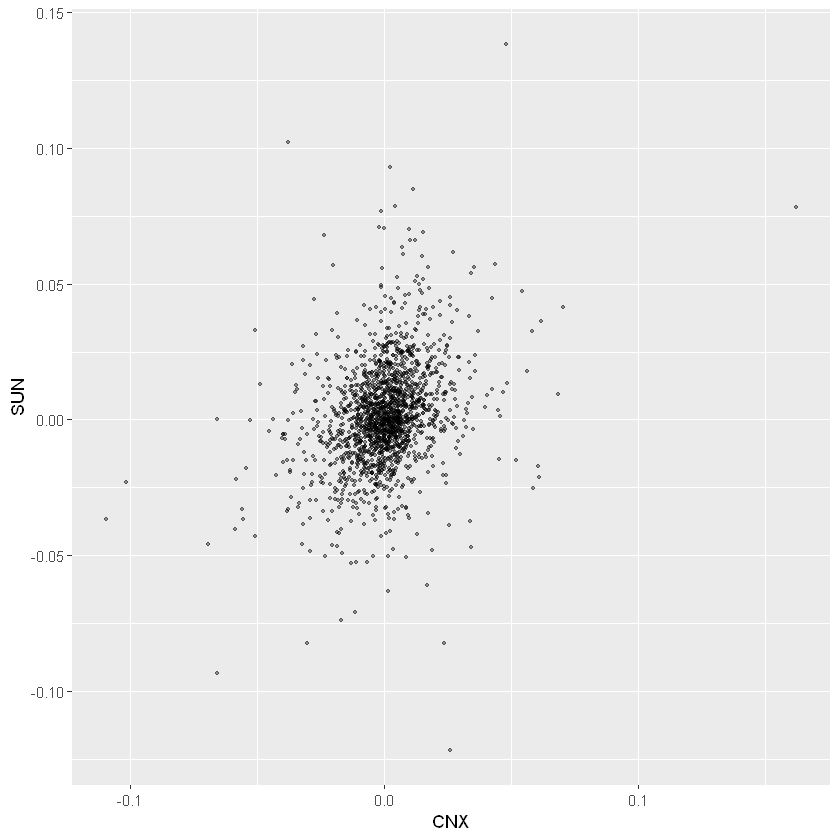

In [52]:
p <- ggplot(simple_df, aes(CNX,SUN))
p <- p + geom_point(size=0.8, alpha=0.4)

p

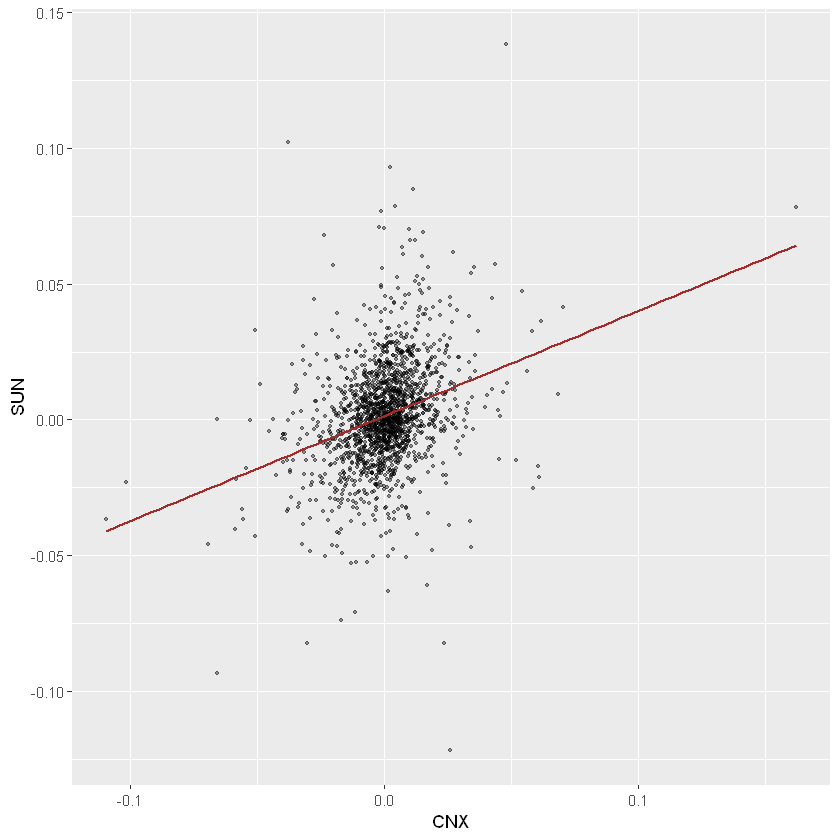

In [53]:
my.formula <- y ~ x
p <- p + geom_smooth(method="lm", formula = my.formula, se=FALSE, color="brown", size=0.6)
#p <- p + stat_poly_eq(formula = my.formula,aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), parse = TRUE)
p

In [54]:
mod <- lm(SUN~CNX, data=simple_df)
summary(mod)


Call:
lm(formula = SUN ~ CNX, data = simple_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.133076 -0.009781 -0.001185  0.009291  0.118347 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0013923  0.0004481   3.107  0.00192 ** 
CNX         0.3869908  0.0288450  13.416  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01864 on 1729 degrees of freedom
Multiple R-squared:  0.09429,	Adjusted R-squared:  0.09376 
F-statistic:   180 on 1 and 1729 DF,  p-value: < 2.2e-16


In [55]:
ggplotRegression <- function(dat, xvar, yvar){
  
  fml <- paste(yvar, "~", xvar)

  fit <- lm(fml, dat)
  
  ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
    geom_point(size=0.8, alpha=0.4) +
    stat_smooth(method = "lm", col = "red") +
    labs(title = paste(" Beta =",signif(fit$coef[[2]], 5),
                       "Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                       "Intercept =",signif(fit$coef[[1]],5 ),
                       " P =",signif(summary(fit)$coef[2,4], 5)))
}

`geom_smooth()` using formula 'y ~ x'


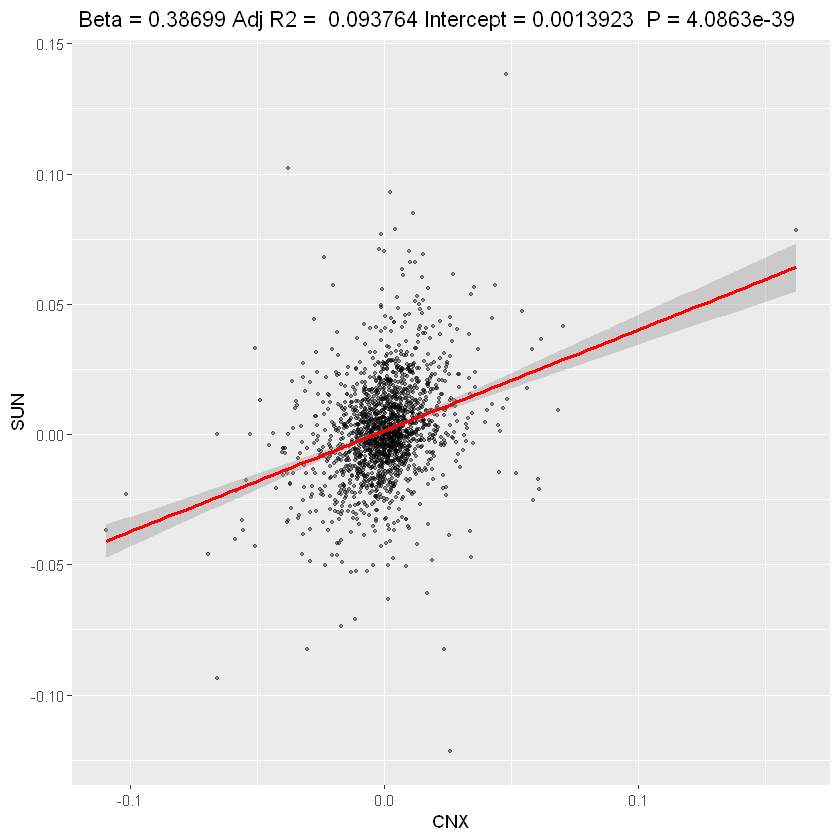

In [56]:
ggplotRegression(simple_df, "CNX", "SUN")

In [57]:
install.packages("gridExtra")


package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\woosh\AppData\Local\Temp\RtmpqWHac7\downloaded_packages


In [58]:
names_df <- names(simple_df)
names_df

[1] "CNX"        "TATA AUTO"  "HDFC"       "LARSEN"     "TKK"       
 [6] "DABUR"      "SUN"        "WIPRO"      "TATA STEEL" "INDIAN"    
[11] "NTPC"       "BHARTI"

In [59]:
names_df[2]

[1] "TATA AUTO"

In [60]:
names(simple_df)[2] <- "TATA"
names(simple_df)[9] <- "TATASTEEL"

In [61]:
names(simple_df)

[1] "CNX"       "TATA"      "HDFC"      "LARSEN"    "TKK"       "DABUR"    
 [7] "SUN"       "WIPRO"     "TATASTEEL" "INDIAN"    "NTPC"      "BHARTI"

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


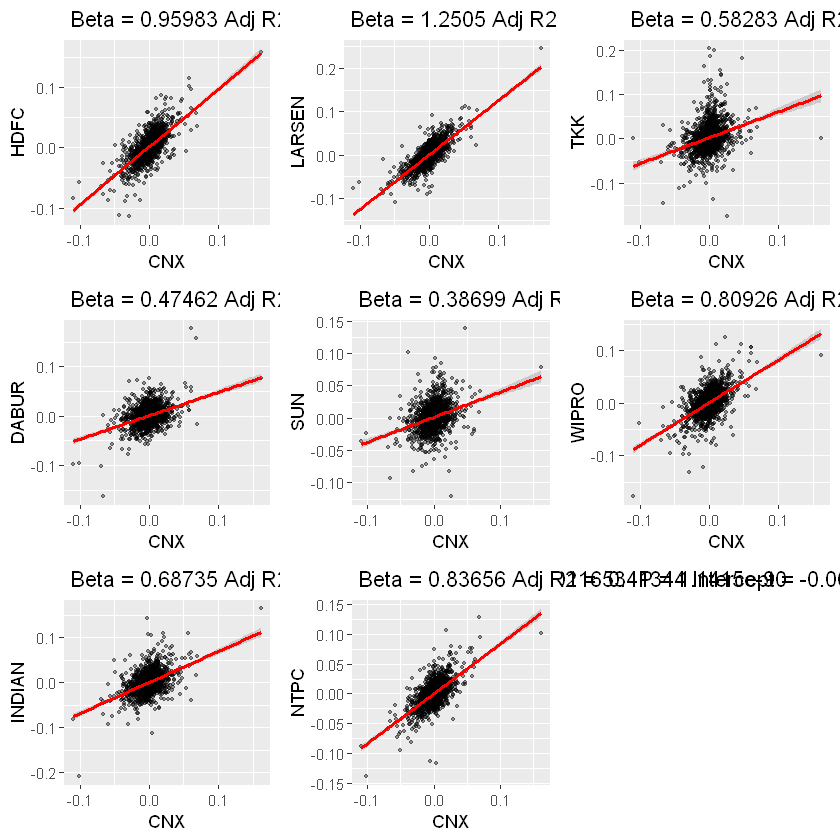

In [62]:
#p1 <- ggplotRegression(simple_df, "CNX", names_df[2])
p2 <- ggplotRegression(simple_df, "CNX", names_df[3])
p3 <- ggplotRegression(simple_df, "CNX", names_df[4])
p4 <- ggplotRegression(simple_df, "CNX", names_df[5])
p5 <- ggplotRegression(simple_df, "CNX", names_df[6])
p6 <- ggplotRegression(simple_df, "CNX", names_df[7])
p7 <- ggplotRegression(simple_df, "CNX", names_df[8])
#p8 <- ggplotRegression(simple_df, "CNX", names_df[9])
p9 <- ggplotRegression(simple_df, "CNX", names_df[10])
p10 <- ggplotRegression(simple_df, "CNX", names_df[11])
gridExtra::grid.arrange(p2,p3,p4,p5,p6,p7,p9,p10)

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


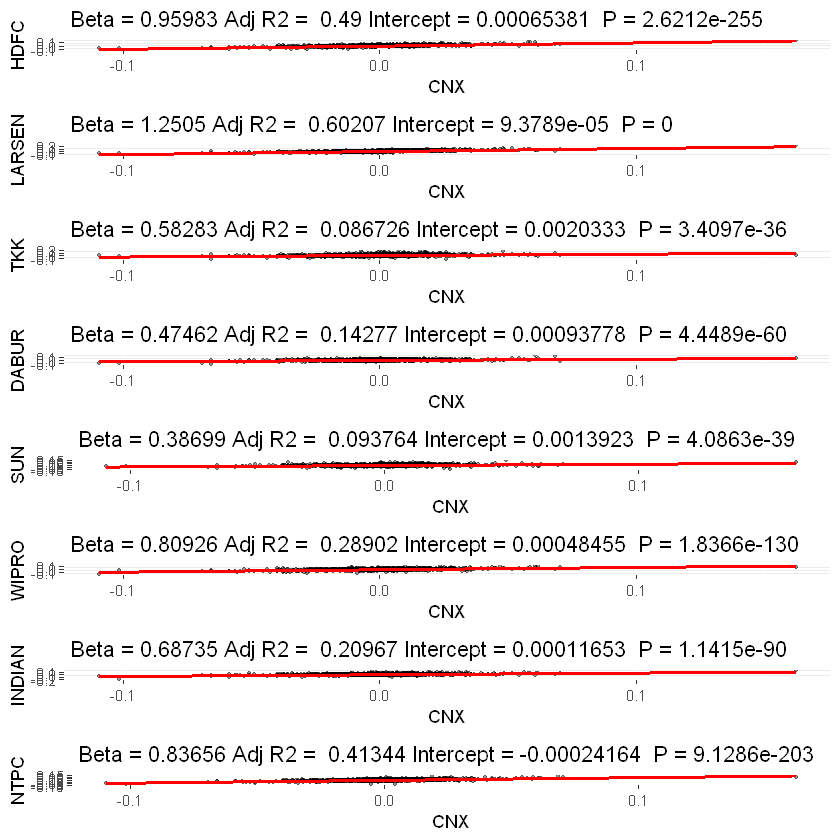

In [63]:
gridExtra::grid.arrange(p2,p3,p4,p5,p6,p7,p9,p10, nrow=8)

In [64]:
mod <- lm(TATA ~ CNX, data= simple_df[,1:2])
summary(mod)


Call:
lm(formula = TATA ~ CNX, data = simple_df[, 1:2])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.108002 -0.012560 -0.001661  0.011681  0.178869 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0010980  0.0005757   1.907   0.0567 .  
CNX         1.2422522  0.0370613  33.519   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02395 on 1729 degrees of freedom
Multiple R-squared:  0.3939,	Adjusted R-squared:  0.3935 
F-statistic:  1124 on 1 and 1729 DF,  p-value: < 2.2e-16


In [65]:
mod <- lm(TATASTEEL ~ CNX, data= simple_df)
summary(mod)


Call:
lm(formula = TATASTEEL ~ CNX, data = simple_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.095248 -0.011193 -0.001121  0.010512  0.115324 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0002888  0.0004943  -0.584    0.559    
CNX          1.4307787  0.0318184  44.967   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02056 on 1729 degrees of freedom
Multiple R-squared:  0.5391,	Adjusted R-squared:  0.5388 
F-statistic:  2022 on 1 and 1729 DF,  p-value: < 2.2e-16


### Slope of OLS of Log Return

$$ \beta = \frac{cov(log(x),log(y))}{var(log(x))}$$

where x = CNX simple return and y = Stock simple return

$$ \beta = \frac{cov(log(CNX),log(Stock))}{var(log(CNX))}$$

In [66]:
log_df <- select(LogRet_df, CNX:BHARTI)
head(log_df)

CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0098408260,0.0391933515,-0.016248335,-0.001904787,-0.01524302,-0.005552178,-0.007535397,-0.0101274365,0.001393450,-0.0103627541,-0.001371126,-0.001655190
0.0008088953,-0.0006310905,-0.008830384,-0.020380893,0.03047312,0.019088656,-0.042870953,-0.0297913210,-0.007957849,0.0158246175,0.071299067,-0.015766804
0.0110372989,-0.0110983912,0.000000000,0.046729798,0.08025446,0.020379183,-0.023328762,-0.0060662671,0.005491273,0.0009608246,-0.016972905,-0.001264051
-0.0004453788,0.0021045938,-0.022068992,0.007996010,-0.05641142,0.023195292,0.006432156,-0.0246439480,-0.005923266,-0.0378391098,-0.009816803,-0.014755333
-0.0072716492,-0.0204372696,0.034396122,0.012653820,-0.04429365,-0.038127179,-0.002381100,0.0224105292,-0.037977134,-0.0418197411,-0.014632740,0.038909227
-0.0015395438,0.0019475047,0.017605312,0.001209650,-0.03031722,-0.009235988,-0.012613315,0.0004035704,0.002800932,-0.0043074978,0.045204168,-0.001080118


In [67]:
cov(log_df$CNX,log_df[,-1])/var(log_df$CNX)

TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
1.24407,0.9563905,1.237447,0.5840551,0.4786407,0.3853105,0.8146319,1.438524,0.691032,0.8389921,0.8416566


In [68]:
cov(simple_df$CNX,simple_df[,-1])/var(simple_df$CNX)

TATA,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATASTEEL,INDIAN,NTPC,BHARTI
1.242252,0.9598348,1.250483,0.5828313,0.4746212,0.3869908,0.8092555,1.430779,0.6873509,0.8365556,0.8498457


In [69]:
names(log_df)[2] <- "TATA"
names(log_df)[9] <- "TATASTEEL"

In [70]:
mod <- lm(SUN~CNX, data=log_df)
summary(mod)


Call:
lm(formula = SUN ~ CNX, data = log_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.140826 -0.009639 -0.001027  0.009401  0.110861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0012476  0.0004466   2.793  0.00527 ** 
CNX         0.3853105  0.0287704  13.393  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01858 on 1729 degrees of freedom
Multiple R-squared:  0.09399,	Adjusted R-squared:  0.09346 
F-statistic: 179.4 on 1 and 1729 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'


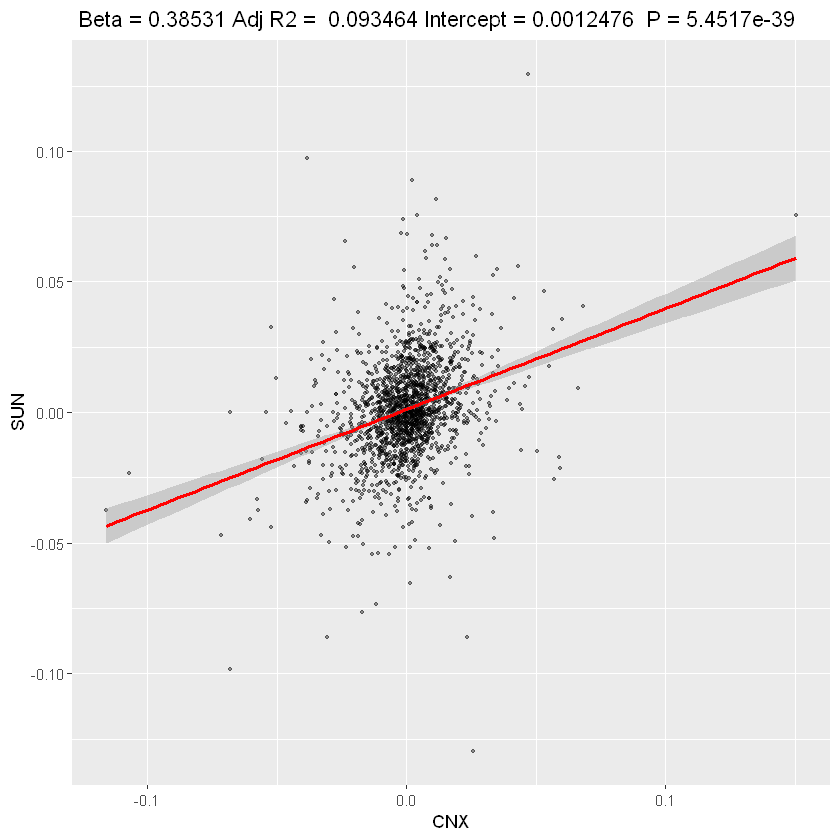

In [71]:
ggplotRegression(log_df, "CNX", "SUN")

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


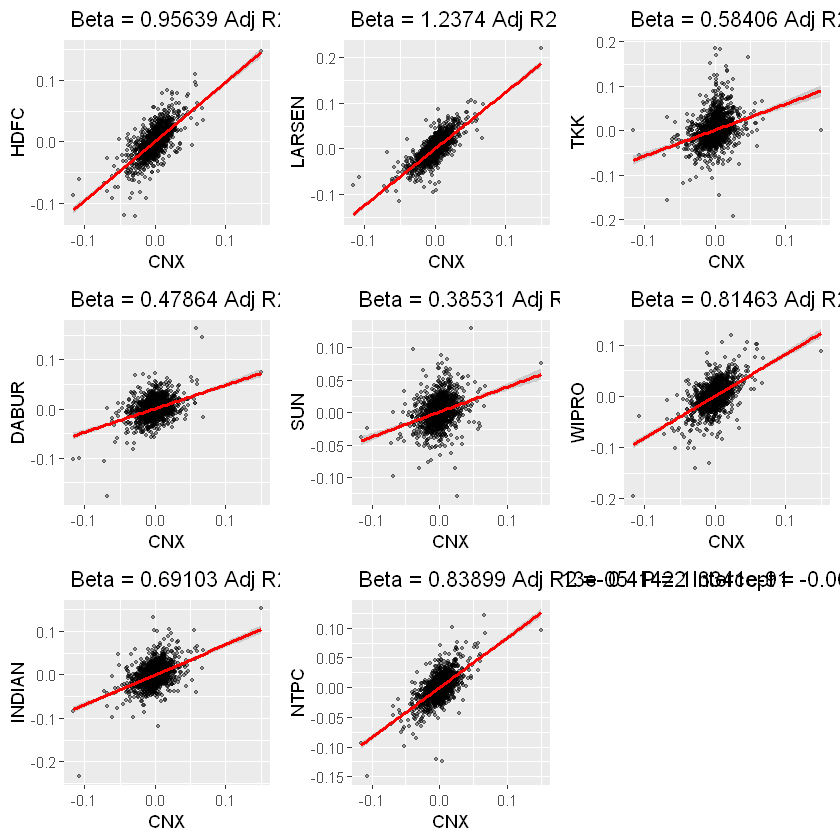

In [72]:
#p1 <- ggplotRegression(log_df, "CNX", names_df[2])
p2 <- ggplotRegression(log_df, "CNX", names_df[3])
p3 <- ggplotRegression(log_df, "CNX", names_df[4])
p4 <- ggplotRegression(log_df, "CNX", names_df[5])
p5 <- ggplotRegression(log_df, "CNX", names_df[6])
p6 <- ggplotRegression(log_df, "CNX", names_df[7])
p7 <- ggplotRegression(log_df, "CNX", names_df[8])
#p8 <- ggplotRegression(log_df, "CNX", names_df[9])
p9 <- ggplotRegression(log_df, "CNX", names_df[10])
p10 <- ggplotRegression(log_df, "CNX", names_df[11])
gridExtra::grid.arrange(p2,p3,p4,p5,p6,p7,p9,p10)

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


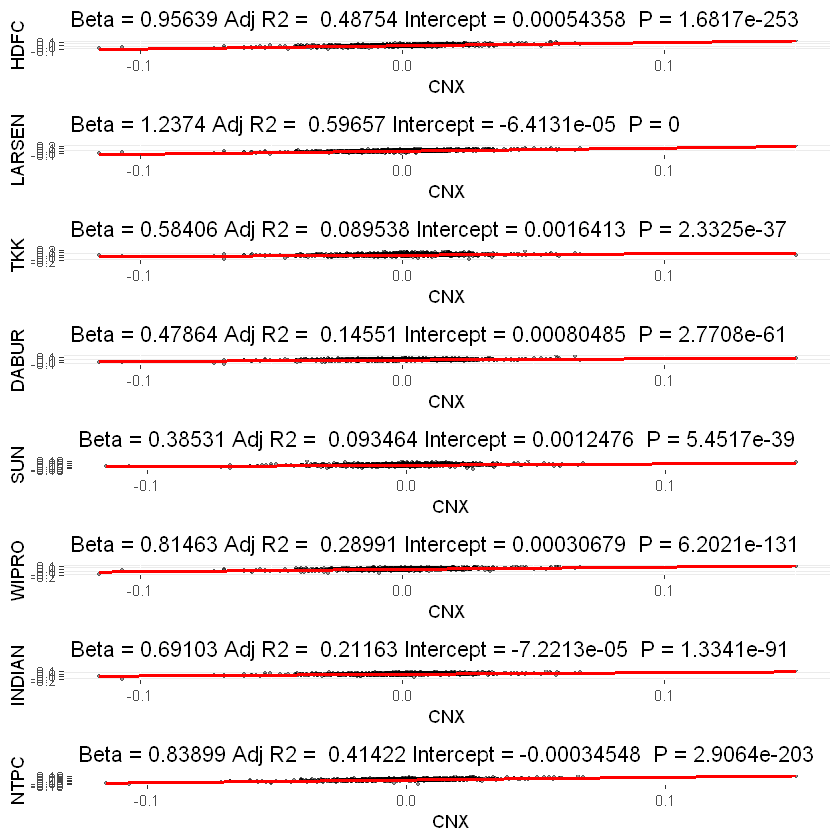

In [73]:
gridExtra::grid.arrange(p2,p3,p4,p5,p6,p7,p9,p10, nrow=8)


In [74]:
mod <- lm(TATA ~ CNX, data= log_df)
summary(mod)


Call:
lm(formula = TATA ~ CNX, data = log_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.115251 -0.012537 -0.001344  0.012069  0.163051 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0007779  0.0005703   1.364    0.173    
CNX         1.2440700  0.0367355  33.866   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02373 on 1729 degrees of freedom
Multiple R-squared:  0.3988,	Adjusted R-squared:  0.3984 
F-statistic:  1147 on 1 and 1729 DF,  p-value: < 2.2e-16


In [75]:
mod <- lm(TATASTEEL ~ CNX, data= log_df)
summary(mod)


Call:
lm(formula = TATASTEEL ~ CNX, data = log_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.106295 -0.010987 -0.000843  0.010650  0.108105 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0005765  0.0004936  -1.168    0.243    
CNX          1.4385237  0.0317952  45.243   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02054 on 1729 degrees of freedom
Multiple R-squared:  0.5421,	Adjusted R-squared:  0.5418 
F-statistic:  2047 on 1 and 1729 DF,  p-value: < 2.2e-16


## Working with Dates

In [76]:
class(CumLogRet_df$DATE)

[1] "POSIXct" "POSIXt"

In [77]:
head(CumLogRet_df$DATE)

[1] "2008-01-02 UTC" "2008-01-03 UTC" "2008-01-04 UTC" "2008-01-07 UTC"
[5] "2008-01-08 UTC" "2008-01-09 UTC"

In [78]:
format(CumLogRet_df$DATE[1], "%Y")

[1] "2008"

In [79]:
SimpleRet_df$Year <- format(SimpleRet_df$DATE, "%Y")

In [80]:
head(SimpleRet_df)

DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI,Year
2008-01-02,0.0098894062,0.0399715443,-0.016117043,-0.001902974,-0.01512743,-0.005536793,-0.007507077,-0.0100763267,0.001394421,-0.0103092457,-0.001370187,-0.001653821,2008
2008-01-03,0.0008092225,-0.0006308914,-0.008791511,-0.020174607,0.03094218,0.019272009,-0.041964987,-0.0293519337,-0.007926269,0.0159504898,0.073902347,-0.015643159,2008
2008-01-04,0.0110984346,-0.0110370313,0.000000000,0.047838843,0.08356275,0.020588257,-0.023058750,-0.0060479044,0.005506378,0.0009612863,-0.016829677,-0.001263252,2008
2008-01-07,-0.0004452797,0.0021068100,-0.021827253,0.008028064,-0.05484980,0.023466395,0.006452887,-0.0243427651,-0.005905758,-0.0371321556,-0.009768776,-0.014647007,2008
2008-01-08,-0.0072452747,-0.0202298441,0.034994510,0.012734219,-0.04332701,-0.037409488,-0.002378267,0.0226635315,-0.037265045,-0.0409573591,-0.014526201,0.039676104,2008
2008-01-09,-0.0015383593,0.0019494024,0.017761199,0.001210382,-0.02986226,-0.009193468,-0.012534100,0.0004036519,0.002804858,-0.0042982338,0.046241447,-0.001079535,2008


In [81]:
tail(SimpleRet_df)

,DATE,CNX,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI,Year
1726,2014-12-23,-0.006101570,-0.013239350,-0.004098232,-1.732049e-02,-0.0039271495,0.007574121,-0.0020252854,-0.004953500,-0.022893227,-0.0017875952,0.0284140969,0.018347566,2014
1727,2014-12-24,-0.007817381,-0.008605089,-0.015106184,-1.331957e-02,0.0004123015,-0.018900385,-0.0102699711,-0.012492536,0.001139919,-0.0244739137,-0.0252016849,-0.005911297,2014
1728,2014-12-26,0.003638725,0.002479042,0.003591985,8.356703e-03,-0.0031739853,0.006786369,0.0080775444,0.003483681,0.007590111,0.0027534300,-0.0003661931,0.003397563,2014
1729,2014-12-29,0.006562038,0.020406207,0.003218029,6.717646e-05,0.0015992236,-0.006523160,0.0111563116,0.005023635,0.014689275,0.0128147815,0.0057879698,-0.008750394,2014
1730,2014-12-30,0.002254919,-0.002625583,0.004986238,5.334442e-03,0.0124867064,0.016852718,0.0003657422,0.004361876,-0.019302251,0.0016568168,0.0131847319,-0.004126055,2014
1731,2014-12-31,0.005925361,0.003645780,-0.005066838,-2.402797e-03,0.0120354353,0.006241948,0.0068246908,0.004797555,0.007822214,-0.0007516583,0.0144510748,0.008432935,2014


In [82]:
seq(unique(SimpleRet_df$Year))

[1] 1 2 3 4 5 6 7

In [83]:
years <- unique(SimpleRet_df$Year)
output <- matrix(ncol=12, nrow=length(years))

for (y in 1:7){
    df <- SimpleRet_df %>% filter(Year==years[y]) %>% select(CNX:BHARTI)  
    #print(years[y])
    beta_df <- cov(df$CNX,df[,-1])/var(df$CNX)
    #print(beta_df)
    
    output[y,] <- c(years[y],signif(as.numeric(beta_df[1,]),4))
}

output <- data.frame(output)
names(output) <- names(SimpleRet_df[2:13])
names(output)[1] <- "YEAR"
output

YEAR,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008,1.019,0.9873,1.102,0.4458,0.6541,0.3041,0.9692,1.314,0.7692,0.9985,0.8243
2009,1.337,0.8356,1.362,0.4645,0.2412,0.3848,0.7549,1.592,0.491,0.6195,0.9192
2010,1.567,0.8786,0.9776,0.8585,0.3417,0.4528,0.8857,1.658,0.5407,0.6129,0.7723
2011,1.728,1.093,1.27,1.009,0.3633,0.6356,0.8782,1.325,0.4947,0.866,0.78
2012,1.57,0.9157,1.703,1.078,0.4133,0.4315,0.6336,1.544,0.3982,0.6789,0.88
2013,1.021,1.245,1.515,0.5103,0.4947,0.6203,0.2144,1.351,0.9737,0.7791,1.127
2014,1.307,0.8768,1.449,0.8861,0.3988,0.1913,0.368,1.573,1.492,1.113,0.6701


In [84]:
years <- unique(SimpleRet_df$Year)
for (y in 1:7){
    df <- SimpleRet_df %>% filter(Year==years[y]) %>% select(CNX:BHARTI)
    mod <- lm(SUN~CNX, data=df)
    print(years[y])
    print(summary(mod))
}



[1] "2008"

Call:
lm(formula = SUN ~ CNX, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.074748 -0.015433 -0.002657  0.013715  0.112454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001195   0.001774   0.674    0.501    
CNX         0.304067   0.064789   4.693 4.49e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02759 on 243 degrees of freedom
Multiple R-squared:  0.08311,	Adjusted R-squared:  0.07934 
F-statistic: 22.03 on 1 and 243 DF,  p-value: 4.495e-06

[1] "2009"

Call:
lm(formula = SUN ~ CNX, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132807 -0.010269 -0.000169  0.011881  0.118663 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001179   0.001552   0.760    0.448    
CNX         0.384847   0.074085   5.195 4.43e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residu

In [92]:
years <- unique(SimpleRet_df$Year)
outputR <- matrix(ncol=12, nrow=length(years))
R2_df <- matrix(ncol=11,nrow=1)

for (y in 1:7){
    df <- SimpleRet_df %>% filter(Year==years[y]) %>% select(CNX:BHARTI)  
    #print(years[y])
    for (i in 1:11){
        rho <- cov(df$CNX,df[,i+1])/(sd(df$CNX)*sd(df[,i+1]))
        #print(x)
        R2_df[i] <- rho^2
    }
    #print(R2_df)
    
    outputR[y,] <- c(years[y],signif(as.numeric(R2_df),3))
}

outputR <- data.frame(outputR)
names(outputR) <- names(SimpleRet_df[2:13])
names(outputR)[1] <- "YEAR"
print("R-squared")
outputR

[1] "R-squared"


YEAR,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
2008,0.423,0.511,0.668,0.119,0.289,0.0831,0.452,0.603,0.359,0.653,0.436
2009,0.41,0.532,0.701,0.0663,0.0633,0.103,0.31,0.586,0.149,0.385,0.335
2010,0.361,0.29,0.386,0.0604,0.0429,0.0816,0.223,0.523,0.0699,0.25,0.121
2011,0.526,0.592,0.53,0.147,0.0843,0.21,0.362,0.586,0.125,0.396,0.266
2012,0.373,0.453,0.592,0.114,0.08,0.095,0.148,0.456,0.0811,0.201,0.16
2013,0.242,0.526,0.556,0.066,0.101,0.145,0.0143,0.369,0.228,0.22,0.277
2014,0.341,0.348,0.468,0.128,0.0505,0.00995,0.0391,0.359,0.278,0.233,0.122


## Portfolio Optimization

In [96]:
stockNames <- names(SimpleRet_df)[-which(names(SimpleRet_df) %in% c("DATE","CNX","Year"))]

In [98]:
head(SimpleRet_df[stockNames])

TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
0.0399715443,-0.016117043,-0.001902974,-0.01512743,-0.005536793,-0.007507077,-0.0100763267,0.001394421,-0.0103092457,-0.001370187,-0.001653821
-0.0006308914,-0.008791511,-0.020174607,0.03094218,0.019272009,-0.041964987,-0.0293519337,-0.007926269,0.0159504898,0.073902347,-0.015643159
-0.0110370313,0.000000000,0.047838843,0.08356275,0.020588257,-0.023058750,-0.0060479044,0.005506378,0.0009612863,-0.016829677,-0.001263252
0.0021068100,-0.021827253,0.008028064,-0.05484980,0.023466395,0.006452887,-0.0243427651,-0.005905758,-0.0371321556,-0.009768776,-0.014647007
-0.0202298441,0.034994510,0.012734219,-0.04332701,-0.037409488,-0.002378267,0.0226635315,-0.037265045,-0.0409573591,-0.014526201,0.039676104
0.0019494024,0.017761199,0.001210382,-0.02986226,-0.009193468,-0.012534100,0.0004036519,0.002804858,-0.0042982338,0.046241447,-0.001079535


In [ ]:
years

In [ ]:
years[1]

In [ ]:
length(years)

In [ ]:
a <- 2.718282
print (signif (a,3) )

![title](img/optprobsum.png)

In [102]:
#install.packages("lpSolve")
#install.packages("lpSolveAPI")
library(lpSolve)
library(lpSolveAPI)

Warning message:
"package 'lpSolve' was built under R version 3.6.2"Warning message:
"package 'lpSolveAPI' was built under R version 3.6.3"

In [103]:
maxLoss <- matrix(apply(SimpleRet_df[stockNames],2,min)) # apply min function to every Column(2) or Row(1)

In [105]:
maxLoss = -maxLoss # Risk needs to be a positive number for minimization to work (Risk = -1 x MaxLoss)
maxLoss

0.1765325
0.1145992
0.1089442
0.1764230
0.1634240
0.1216849
0.1780979
0.1513670
0.2093083
0.1395952
0.1706922


In [108]:
n=nrow(maxLoss)
n

[1] 11

In [109]:
linearModel <- make.lp(0,n)
linearModel

Model name: 
  a linear program with 11 decision variables and 0 constraints

In [110]:
# Specify the Objective function of the linear Model
set.objfn(linearModel, c(maxLoss))

In [112]:
#Constraints
expectedReturn <- matrix(colMeans(SimpleRet_df[stockNames]),nrow=1)
expectedReturn

0.001412376,0.0008967399,0.0004102782,0.002180832,0.001057902,0.001490284,0.0006893665,7.333185e-05,0.0002904934,-2.990877e-05,0.0001326445


In [113]:
# Add Constraints
add.constraint(linearModel,c(expectedReturn),">=", 0.0002)

In [115]:
add.constraint(linearModel,rep(1,n),"=",1)

In [116]:
linearModel

Model name: 
  a linear program with 11 decision variables and 2 constraints

In [117]:
# Set Boundaries
set.bounds(linearModel, lower = rep(0,n), upper=(rep(1,n)))

In [118]:
solve(linearModel) # 0 = Success

[1] 0

In [119]:
get.variables(linearModel)

[1] 0 0 1 0 0 0 0 0 0 0 0

In [120]:
get.objective(linearModel)

[1] 0.1089442

![title](img/qer1.png)
![title](img/qer2.png)
![title](img/qer3.png)
![title](img/qer4.png)
![title](img/qer5.png)
![title](img/qer6.png)
![title](img/qer7.png)

In [126]:
#install.packages("quadprog")
library(quadprog)

In [127]:
objectveMatrix=cov(SimpleRet_df[stockNames])
objectveMatrix

,TATA AUTO,HDFC,LARSEN,TKK,DABUR,SUN,WIPRO,TATA STEEL,INDIAN,NTPC,BHARTI
TATA AUTO,0.0009457837,2.679527e-04,0.0003780018,1.915930e-04,1.178336e-04,1.140694e-04,2.639769e-04,0.0005135660,1.846435e-04,2.271212e-04,2.326209e-04
HDFC,0.0002679527,4.535896e-04,0.0003012964,1.220759e-04,9.894656e-05,1.000672e-04,1.829519e-04,0.0002947108,1.460357e-04,1.807425e-04,2.024354e-04
LARSEN,0.0003780018,3.012964e-04,0.0006267129,1.786681e-04,1.163391e-04,9.808700e-05,2.200217e-04,0.0004313214,1.884761e-04,2.362783e-04,2.461578e-04
TKK,0.0001915930,1.220759e-04,0.0001786681,9.397791e-04,7.857189e-05,4.571047e-05,1.009814e-04,0.0002122716,7.867681e-05,1.197445e-04,7.725312e-05
DABUR,0.0001178336,9.894656e-05,0.0001163391,7.857189e-05,3.795513e-04,7.473666e-05,9.276535e-05,0.0001520999,8.666072e-05,1.037243e-04,7.559589e-05
SUN,0.0001140694,1.000672e-04,0.0000980870,4.571047e-05,7.473666e-05,3.834138e-04,1.195650e-04,0.0001207438,3.606139e-05,8.179242e-05,8.678619e-05
WIPRO,0.0002639769,1.829519e-04,0.0002200217,1.009814e-04,9.276535e-05,1.195650e-04,5.461926e-04,0.0002837002,9.638464e-05,1.556167e-04,1.801781e-04
TATA STEEL,0.0005135660,2.947108e-04,0.0004313214,2.122716e-04,1.520999e-04,1.207438e-04,2.837002e-04,0.0009167059,1.828620e-04,2.657320e-04,2.706321e-04
INDIAN,0.0001846435,1.460357e-04,0.0001884761,7.867681e-05,8.666072e-05,3.606139e-05,9.638464e-05,0.0001828620,5.427392e-04,1.636170e-04,1.310055e-04
NTPC,0.0002271212,1.807425e-04,0.0002362783,1.197445e-04,1.037243e-04,8.179242e-05,1.556167e-04,0.0002657320,1.636170e-04,4.082624e-04,1.677862e-04


In [128]:
objectiveVectorQuad=rep(0,n) # n zeros
objectiveVectorQuad

[1] 0 0 0 0 0 0 0 0 0 0 0

In [129]:
# Constraints
constraintMatrixQuadRow1 = matrix(1,1,n)
constraintMatrixQuadRow1

1,1,1,1,1,1,1,1,1,1,1


In [130]:
constraintMatrixQuadRow2 = expectedReturn
constraintMatrixQuadRow2

0.001412376,0.0008967399,0.0004102782,0.002180832,0.001057902,0.001490284,0.0006893665,7.333185e-05,0.0002904934,-2.990877e-05,0.0001326445


In [134]:
# left hand side
constraintMatrixQuadCombined = rbind(constraintMatrixQuadRow1,constraintMatrixQuadRow2)
constraintMatrixQuadCombined

1.000000000,1.0000000000,1.0000000000,1.000000000,1.000000000,1.000000000,1.0000000000,1.000000e+00,1.0000000000,1.000000e+00,1.0000000000
0.001412376,0.0008967399,0.0004102782,0.002180832,0.001057902,0.001490284,0.0006893665,7.333185e-05,0.0002904934,-2.990877e-05,0.0001326445


In [135]:
# columnwise
constraintMatrixQuadCombined = t(constraintMatrixQuadCombined) #transpose

In [136]:
constraintMatrixQuadCombined

1,1.412376e-03
1,8.967399e-04
1,4.102782e-04
1,2.180832e-03
1,1.057902e-03
1,1.490284e-03
1,6.893665e-04
1,7.333185e-05
1,2.904934e-04
1,-2.990877e-05
1,1.326445e-04


In [144]:
# right hand side
constraintVectorQuadCombined=c(1,0.005)
constraintVectorQuadCombined

[1] 1.000 0.005

In [145]:
# Number of equality constraints
numEqualityConstraints=1

In [146]:
# Solve Quadratic Problem
# Dmat = covariance matrix (i.e. Quadratic term in objective function)
# dvec = Linear Term in objective function - here all zeroes
# Amat = Left Hand Side (LHS) constraints
# bvec = Right Hand Side (RHS) constraints
# meq = Number of equality constraints

solutionQuad <- solve.QP(Dmat=objectveMatrix, 
                         dvec = objectiveVectorQuad,
                        Amat = constraintMatrixQuadCombined,
                        bvec = constraintVectorQuadCombined,
                        meq=numEqualityConstraints)

In [147]:
# Results: Optimal Values of decision variables
weightsQuad=solutionQuad$solution
weightsQuad

[1]  0.69624506  0.54284134 -0.24616931  0.77855277  0.51517270  1.02540773
 [7] -0.03063772 -0.63584157 -0.18897044 -1.08062717 -0.37597338

In [148]:
sum(weightsQuad)

[1] 1

![title](img/qer8.png)

In [149]:
# Forecast Variance of daily Return
portfolioRiskQuad <- t(weightsQuad) %*% cov(SimpleRet_df[stockNames]) %*% weightsQuad
portfolioRiskQuad

0.001866637


In [150]:
# Expected Portfolio Return
portfolioReturnQuad=expectedReturn %*% weightsQuad
portfolioReturnQuad

0.005


![text](img/qer9.png)

In [151]:
# DO NOT ALLOW SHORT SELLING
# LHS of non-negativity constraints
constraintMatrixQuadLongOnlyRow1 =diag(n)
constraintMatrixQuadLongOnlyRow1

1,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,1


In [152]:
constraintsMatrixQuadLongOnlyCombined = rbind(t(constraintMatrixQuadCombined),constraintMatrixQuadLongOnlyRow1)
constraintsMatrixQuadLongOnlyCombined


1.000000000,1.0000000000,1.0000000000,1.000000000,1.000000000,1.000000000,1.0000000000,1.000000e+00,1.0000000000,1.000000e+00,1.0000000000
0.001412376,0.0008967399,0.0004102782,0.002180832,0.001057902,0.001490284,0.0006893665,7.333185e-05,0.0002904934,-2.990877e-05,0.0001326445
1.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,1.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,0.0000000000,1.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,0.0000000000,0.0000000000,1.000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,0.0000000000,0.0000000000,0.000000000,1.000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,1.000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,1.0000000000,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,1.000000e+00,0.0000000000,0.000000e+00,0.0000000000
0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000e+00,1.0000000000,0.000000e+00,0.0000000000


In [153]:
# Transpose to column Matrix
constraintsMatrixQuadLongOnlyCombined=t(constraintsMatrixQuadLongOnlyCombined)
constraintsMatrixQuadLongOnlyCombined

1,1.412376e-03,1,0,0,0,0,0,0,0,0,0,0
1,8.967399e-04,0,1,0,0,0,0,0,0,0,0,0
1,4.102782e-04,0,0,1,0,0,0,0,0,0,0,0
1,2.180832e-03,0,0,0,1,0,0,0,0,0,0,0
1,1.057902e-03,0,0,0,0,1,0,0,0,0,0,0
1,1.490284e-03,0,0,0,0,0,1,0,0,0,0,0
1,6.893665e-04,0,0,0,0,0,0,1,0,0,0,0
1,7.333185e-05,0,0,0,0,0,0,0,1,0,0,0
1,2.904934e-04,0,0,0,0,0,0,0,0,1,0,0
1,-2.990877e-05,0,0,0,0,0,0,0,0,0,1,0
1,1.326445e-04,0,0,0,0,0,0,0,0,0,0,1


In [154]:
# RHS of Constraints
constraintsVectorQuadLongOnlyCombined=c(1,0.002,rep(0,n))
constraintsVectorQuadLongOnlyCombined

[1] 1.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[13] 0.000

In [155]:
solutionQuadLongOnly <- solve.QP(Dmat = objectveMatrix,
                                dvec = objectiveVectorQuad,
                                Amat = constraintsMatrixQuadLongOnlyCombined,
                                bvec = constraintsVectorQuadLongOnlyCombined,
                                meq = numEqualityConstraints)

In [156]:
# Optimal values of decision variables
weightsQuadLongOnly=solutionQuadLongOnly$solution
weightsQuadLongOnly

[1]  0.000000e+00  5.959603e-18 -9.032702e-18  7.381325e-01  0.000000e+00
 [6]  2.618675e-01  2.434744e-17 -2.007991e-17  2.136985e-16  2.451191e-16
[11] -3.279499e-17

In [157]:
sum(weightsQuadLongOnly)

[1] 1

In [158]:
# Forecast Variance of daily Return
portfolioRiskQuadLongOnly <- t(weightsQuadLongOnly) %*% cov(SimpleRet_df[stockNames]) %*% weightsQuadLongOnly
portfolioRiskQuadLongOnly

0.0005559924


In [159]:
# Expected Portfolio Return
portfolioReturnQuadLongOnly=expectedReturn %*% weightsQuadLongOnly
portfolioReturnQuadLongOnly

0.002


![text](img/qer10.png)